# CS5228-KDDM, 2025/26-2, Coursework 1


#### Student Name: Lee Junyoung
#### Student Number: A0247530J

# CW1, Part 2: Clustering using Python (2 marks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
from sklearn.cluster import KMeans

In [2]:
# load data
df = pd.read_csv('a1-kmeans-toy-data.csv', header=None)
print(df.head())
print(f"Shape: {df.shape}")

       0      1
0 -0.925  6.267
1 -0.402 -9.457
2 -8.784  7.222
3 -0.029  4.299
4  9.949  0.314
Shape: (100, 2)


First look of the dataset shows that it consists 100 2d data points.

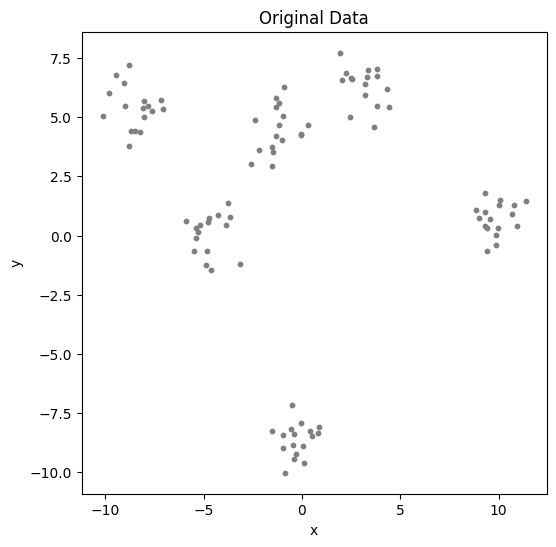

In [3]:
# rename to x, y
df.columns = ['x', 'y']

# 2d scatter plot of original data
plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'], s=10, color='gray')
plt.title('Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We observe there are 6 distinct clusters. Now we apply K-Means with random initialization for k=2,3,4

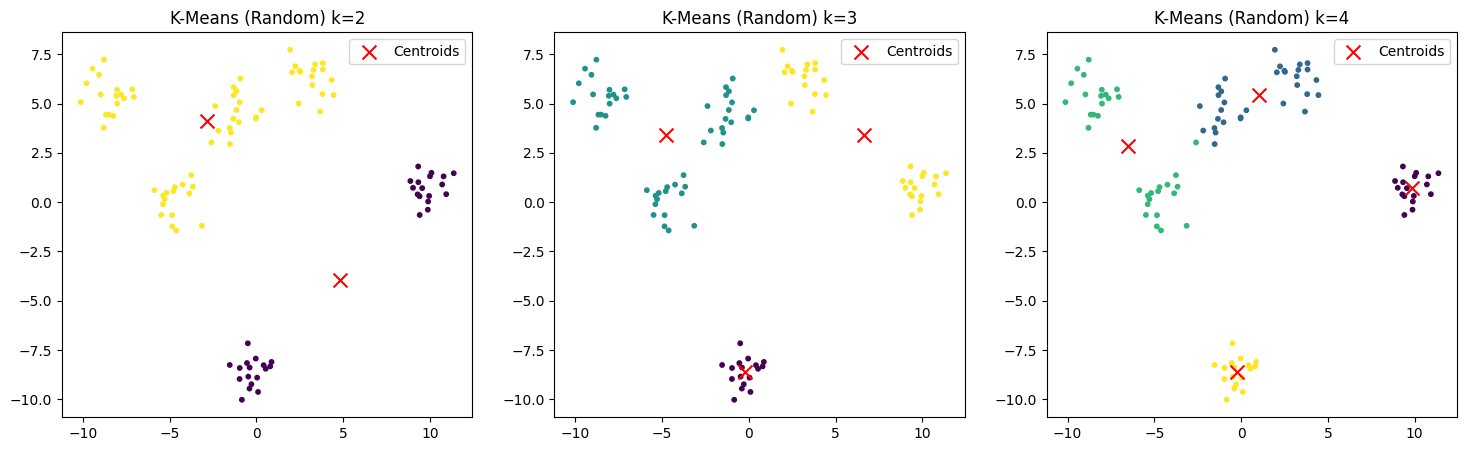

In [4]:
k_values = [2, 3, 4]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(k_values):
    # random init
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
    labels = kmeans.fit_predict(df)
    centers = kmeans.cluster_centers_
    
    axes[i].scatter(df['x'], df['y'], c=labels, cmap='viridis', s=10)
    axes[i].scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centroids')
    axes[i].set_title(f'K-Means (Random) k={k}')
    axes[i].legend()

plt.show()

According to the lecture slides, k-means++ only changes the initialisation of the centroids by spreading them out.

1. pick a random point as first centroid $c_1$

2. Repeat 

    a. for each point $x$, calculate distance $d_x$ to the nearest existing centroid

    b. pick random point for next centroid with probability proportional to $d_x^2$

    until K centroids have been picked

We now apply K-Means++ with random initialization for k=2,3,4

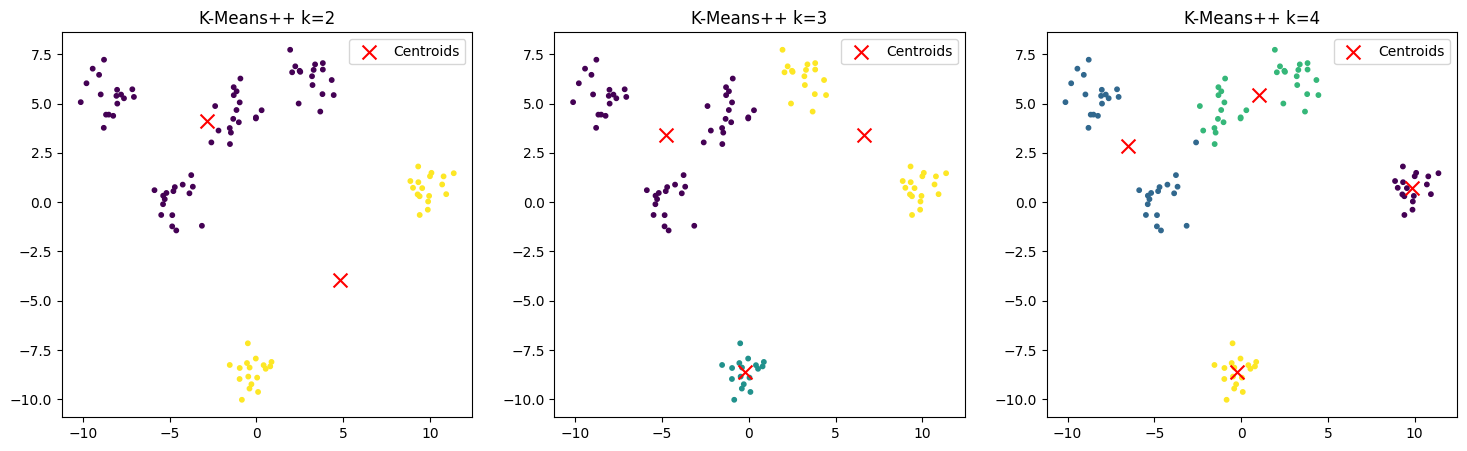

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(k_values):
    # k-means++ init
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(df)
    centers = kmeans.cluster_centers_
    
    axes[i].scatter(df['x'], df['y'], c=labels, cmap='viridis', s=10)
    axes[i].scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centroids')
    axes[i].set_title(f'K-Means++ k={k}')
    axes[i].legend()

plt.show()